In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_excel('Stars List.xlsx', skiprows=1)

In [3]:
df

,Constellation,Common Name,Name,HD,Hipparcos Catalogue,RA,Dec,vis.\nmag.,abs.\nmag.,Dist. (ly),Sp. class,Notes
0,UMa,Alkaid,η UMa,120315,67301,13h 47m 32.55s,+49° 18′ 47.9″,1.85,−0.60,101,B3V SB,"Benetnasch, Alkaid, Elkeid"
1,UMa,Alcor,ζ UMa,116842,65477,13h 25m 13.54s,+54° 59′ 16.7″,3.99,2,82,A5Vn,"Saidak, Suha, Arundhati; naked-eye double star..."
2,UMa,Mizar,ζ1 UMa,116656,65378,13h 23m 55.54s,+54° 55′ 31.3″,2.23,0.32,83,A2V SB,"Mizar A; spectroscopic binary, visual double s..."
3,UMa,Alioth,ε UMa,112185,62956,12h 54m 01.63s,+55° 57′ 35.4″,1.76,−0.21,81,A0p,Alioth; brown dwarf companion?; α² CVn variable
4,UMa,Megrez,δ UMa,106591,59774,12h 15m 25.45s,+57° 01′ 57.4″,3.32,1.33,81,A3Vvar,"Megrez, Kaffa"
5,UMa,Dubhe,α UMa,95689,54061,11h 03m 43.84s,+61° 45′ 04.0″,1.81,−1.08,124,F7V comp,"Dubhe, Dubh, Dubb, Thahr al Dub al Akbar, Ak"
6,UMa,Merak,β UMa,95418,53910,11h 01m 50.39s,+56° 22′ 56.4″,2.34,0.41,79,A1V,"Merak, Mirak"
7,UMa,Phecda,γ UMa,103287,58001,11h 53m 49.74s,+53° 41′ 41.0″,2.41,0.36,84,A0V SB,"Phad, Phecda, Phegda, Phekha, Phacd"


In [20]:
def convert_RA_to_Num(value):
    RA_Text = re.compile('\+?(?P<hour>[0-9]{1,2})(?P<unit>[hH°]) ?((?P<minute>[0-9]{1,2}).)? ?((?P<second>[0-9]{1,2}\.?[0-9]+).)?')
    result = RA_Text.match(value)
    if result:
        coordonate = {}
        for i in ['hour', 'minute', 'second']:
            coordonate[i] = float(result.group(i)) if result.group(i) is not None else 0
        res = coordonate['hour'] + (coordonate['minute'] / 60) + (coordonate['second'] / 3600)
        if result.group('unit') in ['h', 'H']:
            res = res * 360 / 24
    else:
        res = None
    
    return res


In [21]:
convert_RA_to_Num('12h 18m 47.9″')

184.69958333333338

In [22]:
df['RA_Num'] = df['RA'].apply(convert_RA_to_Num)
df['Dec_Num'] = df['Dec'].apply(convert_RA_to_Num)


In [23]:
df

,Constellation,Common Name,Name,HD,Hipparcos Catalogue,RA,Dec,vis.\nmag.,abs.\nmag.,Dist. (ly),Sp. class,Notes,RA_Num,Dec_Num
0,UMa,Alkaid,η UMa,120315,67301,13h 47m 32.55s,+49° 18′ 47.9″,1.85,−0.60,101,B3V SB,"Benetnasch, Alkaid, Elkeid",206.885625,49.313306
1,UMa,Alcor,ζ UMa,116842,65477,13h 25m 13.54s,+54° 59′ 16.7″,3.99,2,82,A5Vn,"Saidak, Suha, Arundhati; naked-eye double star...",201.306417,54.987972
2,UMa,Mizar,ζ1 UMa,116656,65378,13h 23m 55.54s,+54° 55′ 31.3″,2.23,0.32,83,A2V SB,"Mizar A; spectroscopic binary, visual double s...",200.981417,54.925361
3,UMa,Alioth,ε UMa,112185,62956,12h 54m 01.63s,+55° 57′ 35.4″,1.76,−0.21,81,A0p,Alioth; brown dwarf companion?; α² CVn variable,193.506792,55.959833
4,UMa,Megrez,δ UMa,106591,59774,12h 15m 25.45s,+57° 01′ 57.4″,3.32,1.33,81,A3Vvar,"Megrez, Kaffa",183.856042,57.032611
5,UMa,Dubhe,α UMa,95689,54061,11h 03m 43.84s,+61° 45′ 04.0″,1.81,−1.08,124,F7V comp,"Dubhe, Dubh, Dubb, Thahr al Dub al Akbar, Ak",165.932667,61.751111
6,UMa,Merak,β UMa,95418,53910,11h 01m 50.39s,+56° 22′ 56.4″,2.34,0.41,79,A1V,"Merak, Mirak",165.459958,56.382333
7,UMa,Phecda,γ UMa,103287,58001,11h 53m 49.74s,+53° 41′ 41.0″,2.41,0.36,84,A0V SB,"Phad, Phecda, Phegda, Phekha, Phacd",178.457250,53.694722


In [24]:
for i, txt in enumerate(df['Common Name']):
    #print(i)
    print('Dec: {}'.format(df.iloc[i][['RA_Num','Dec_Num']].values.tolist()))

Dec: [206.885625, 49.31330555555555]
Dec: [201.30641666666665, 54.987972222222226]
Dec: [200.98141666666663, 54.92536111111111]
Dec: [193.50679166666666, 55.959833333333336]
Dec: [183.85604166666667, 57.03261111111111]
Dec: [165.93266666666668, 61.75111111111111]
Dec: [165.45995833333336, 56.382333333333335]
Dec: [178.45725000000002, 53.69472222222222]


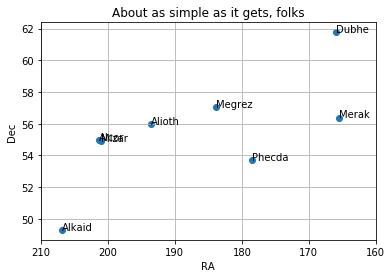

In [26]:
# Data for plotting
fig, ax = plt.subplots()
ax.scatter(df['RA_Num'], df['Dec_Num'])

ax.set(xlabel='RA', ylabel='Dec',
       title='About as simple as it gets, folks')
ax.grid()

for i, txt in enumerate(df['Common Name']):
    ax.annotate(txt, df.iloc[i][['RA_Num','Dec_Num']].values.tolist())

#fig.savefig("test.png")
plt.xlim(210, 160)
#plt.ylim(63, 45)


plt.show()

In [27]:
12*360/24

180.0

In [69]:
def orthographic_Projection(point0, point):
    R = 1
    lat = point[0] * math.pi / 180
    long = point[1] * math.pi / 180
    lat0 = point0[0] * math.pi / 180
    long0 = point0[1] * math.pi / 180
    
    x = R * math.cos(lat) * math.sin(long - long0)
    y = R * (math.cos(lat0)*math.sin(lat) - math.sin(lat0) * math.cos(lat) * math.cos(long - long0))
    c = math.sin(lat0) * math.sin(lat) + math.cos(lat0) * math.cos(lat) * math.cos(long - long0)
    
    print(f"x: {x}, y: {y}, c:{c}")
    if c >= 0:
        return (x,y)
    else:
        return None

In [70]:
orthographic_Projection((180,56), (195,49))

x: 0.11771674622792336, y: 0.25881904510252046, c:0.9587259616541789


(0.11771674622792336, 0.25881904510252046)

In [87]:
points = []
for i in df.iterrows():
    points.append(orthographic_Projection((56,180), (i[1]['Dec_Num'], i[1]['RA_Num'])))

x: 0.29480641591099377, y: -0.05802144445938945, c:0.9537938399468515
x: 0.20847467104782183, y: 0.014848734902363103, c:0.9779150405854804
x: 0.20575964153964732, y: 0.01283209276924896, c:0.9785184246137817
x: 0.13074115421410956, y: 0.01213419608174382, c:0.9913422778638125
x: 0.0365947749235533, y: 0.019042771736647313, c:0.9991487353206632
x: -0.11504187680111432, y: 0.11197470620093158, c:0.987029397613512
x: -0.13899703921905898, y: 0.021373432405337456, c:0.9900621189983736
x: -0.015940659040656183, y: -0.04004590255915602, c:0.9990706787197651


In [88]:
x = []
y = []
for p in points:
    x.append(p[0])
    y.append(p[1])

(0.35, -0.2)

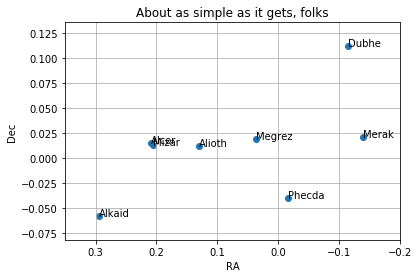

In [91]:
# Data for plotting
fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set(xlabel='RA', ylabel='Dec',
       title='About as simple as it gets, folks')
ax.grid()

for i, txt in enumerate(df['Common Name']):
    ax.annotate(txt, (x[i], y[i]))

#fig.savefig("test.png")
plt.xlim(0.35, -0.20)
#plt.ylim(63, 45)